Полезные материалы по теме временных рядов:
* https://wiki.loginom.ru/articles/arima.html
* https://economy.bsu.by/wp-content/uploads/2016/10/naft_ar_ma.pdf
* https://towardsdatascience.com/the-best-deep-learning-models-for-time-series-forecasting-690767bc63f0
* https://towardsdatascience.com/the-complete-guide-to-time-series-analysis-and-forecasting-70d476bfe775
* https://mse.msu.ru/wp-content/uploads/2021/03/%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5-%D0%B2-%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7-%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85-%D1%80%D1%8F%D0%B4%D0%BE%D0%B2-1.pdf

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Цель-исследования" data-toc-modified-id="Цель-исследования-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Цель исследования</a></span></li><li><span><a href="#План-исследования" data-toc-modified-id="План-исследования-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>План исследования</a></span></li></ul></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

### Цель исследования
Построение модели для прогнозирования количества заказов такси на следующий час.

Целевая метрика - `RMSE`, на тестовой быборке не должна превышать 48.

### План исследования

1. Загрузка данных для исследования из файла `taxi.csv`.

2. О качестве данных информации нет, поэтому как приступать к исследованию проведем обзор данных.
3. Преобработка и подготовка данных:

* проверка данных на наличие пропусков и аномалий и их влияние на исследование
* исправление ошибок и заполнения пропусков, которые не приведут к искажению результатов исследования.
* ресемплирование данных
* анализ признаков на их информативность для построения модели.
* подготовка выборок данных для построения моделей.

4. Построение моделей машинного обучения:
* `LinearRegression`
* `Ridge`
* `DecisionTree`
* `LightGBM`
* `CatBoosting`

 Подбор лучших гиперпараметров для них.

 Выбор лучшей модели по заданным характеристикам

5. Тестирование выбранной модели и оценка результатов.

6. Оформление выводов по результатам исследования

## Подготовка

In [1]:
# импорт библиотек для выполения проекта
import pandas as pd
import numpy as np

from datetime import datetime as dt

# импортируем функции статистического анализа
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import (plot_acf,
                                           plot_pacf)
from statsmodels.tsa.stattools import (adfuller,
                                       kpss)

# графика
import seaborn as sns
import matplotlib.pyplot as plt

# импортируем функции и метрики из библиотеки sklearn
from sklearn.model_selection import (train_test_split,
                                     GridSearchCV,
                                     TimeSeriesSplit)

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import (StandardScaler,
                                   OneHotEncoder)
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyRegressor


# метрики
from sklearn.metrics import mean_squared_error

# импортируем градиентные бустинги
from catboost import (CatBoostRegressor,
                      Pool)
from lightgbm import LGBMRegressor

# предупреждения
import warnings
warnings.filterwarnings('ignore')

In [2]:
# настроим отображение чисел и таблиц
#pd.set_option('display.float_format', '{:.4f}'.format)
pd.set_option('display.max_columns', 1000)
pd.set_option('max_colwidth', 1000)
pd.set_option('display.width', 500)
# выберем общее формление для графиков
sns.set(style="whitegrid", palette="Spectral")

In [3]:
try:
    df = pd.read_csv('./taxi.csv.', parse_dates=[0])
except:
    df = pd.read_csv('/datasets/taxi.csv.', parse_dates=[0])

In [4]:
# зафиксируем псевдослучайность random_state
RS = 2023
# количество фолдов для кросс-валидации
TSCV = TimeSeriesSplit(n_splits=3)

In [5]:
def data_info(data_name):
    '''функция выводит информацию о данных'''
    
    print('\n\nДанные из выборки\n')
    display(data_name.head(5))
    display(data_name.tail(5))

    print(f'\n\nКоличество признаков: {data_name.shape[1]}, Количество наблюдений: {data_name.shape[0]}\n')
    
    print('\nИнформация о данных\n')
    display(data_name.info())
       
    print(f'\n\nКоличество полных дубликатов в данных: {data_name.duplicated().sum()}')

    print('\n\nОписательная статистика ')
    display(data_name.describe())

In [6]:
def make_features(data, max_lag=0, rolling_mean_size=0, max_diff=0,):
    '''функция генерации новых признаков'''
    
    num_col = []
    
    #data['month'] = data.index.month
    #data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    #data['is_weekend'] = data.dayofweek.isin([5,6])*1
    data['hour'] = data.index.hour
    
    if max_lag > 0:
        for lag in range(1, max_lag + 1):
            data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
            num_col.append('lag_{}'.format(lag))
            
    if  max_diff > 0:
        for d in range(1, max_diff+1):
            data['diff_{}'.format(d)] = data['num_orders'].diff(d)
            num_col.append('diff_{}'.format(d))

    if rolling_mean_size > 0:     
        data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
        num_col.append('rolling_mean')
    
    data.dropna(inplace=True)
    
    return data, num_col

In [7]:
def df_train_test(data, target, test_size=0.1):
    '''функция делит на выборки, фичи, таргер
    на входе: исходые данные
    на выходе: обучающие/тестовые фичи/таргеты'''
    # деление на выборки
    data_train, data_test = train_test_split(data, 
                                             test_size=test_size, 
                                             shuffle=False)

    # проверка разбивки
    print('Проверка хронологии обучающей и тестовой выборки:')
    print(f'\nTrain размер: {data_train.shape}')
    print(f'\nДата начала наблюдений: {data_train.index.min()}. ')
    print(f'Дата окончания наблюдений:{data_train.index.max()}')
    print(f'\nВременной отрезок: {data_train.index.max() - data_train.index.min()}')
    
    print(f'\nTest размер: {data_test.shape}')
    print(f'\nДата начала наблюдений: {data_test.index.min()}. ')
    print(f'Дата окончания наблюдений:{data_test.index.max()}')
    print(f'\nВременной отрезок: {data_test.index.max() - data_test.index.min()}')   
    
    target_train = data_train[target]
    features_train = data_train.drop(target, axis=1)

    target_test = data_test[target]
    features_test = data_test.drop(target, axis=1)
    
    return (features_train, target_train,
            features_test, target_test)

In [8]:
def best_model(model, params, features, target, cat_col, num_col, features_type):
    '''функция подбора гиперпараметров для заданной модели
    на входе: модель, параметры для подбора, фичи и таргет,
              категориальные признаки, числовые признаки,
              способ подбора параметров, по умолчанию GridSearchCV
    на выходе: подобранная модель и значение искомой метрики RSME'''
      
    preprocessor = ColumnTransformer(transformers=[
    ('OHE', OneHotEncoder(handle_unknown='ignore', sparse=True), cat_col),
    ('scaler', StandardScaler(), num_col)])
    
    # собираем пайплайн    
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)])  
    
    # подбор гиперпараметров
    searcher = GridSearchCV(pipe,
                            param_grid=params,
                            scoring='neg_root_mean_squared_error',
                            cv=TSCV,
                            n_jobs=-1,
                            verbose=5)
   
    time_start = dt.now()
    search = searcher.fit(features, target)
    time_search = (dt.now() - time_start)
    
    # вычисляем время работы с лучшими параметрами
    pipe.set_params(**search.best_params_)
    
    time_start = dt.now()
    pipe.fit(features, target)
    time_fit = (dt.now() - time_start)
    
    time_start = dt.now()
    pipe.predict(features)
    time_predict = (dt.now() - time_start)
    
    list_best_params.append({'features_type': features_type,
                             'model': search.best_estimator_[-1],
                             'model_params': search.best_params_,
                             'RSME': abs(search.best_score_),
                             'time_search': time_search,
                             'time_fit': time_fit,
                             'time_predict': time_predict})

In [9]:
def model_diff_features(model, params):
    '''функция для подбора параметров различных типов фичей
    на входе: модель и параметры для подбора
    на выходе: заполненные данные о подборе лучших гиперпараметров для каждого
    типа модификации фичей'''
        
    # словарь с данными для каждого типа модификации фичей
    data_dict = {
        'date_features': (features_train_f, target_train_f, numerical_features_f),
        'lag_features': (features_train_lag, target_train_lag, numerical_features_lag),
        'rolling_mean': (features_train_ma, target_train_ma, numerical_features_ma),
        'all_features': (features_train_all, target_train_all, numerical_features_all)
    }

    # клонируем модель
    model_clone = model

    # подбираем гиперпараметры для каждого типа модификации фичей
    for item, (features, targets, numerical_features) in data_dict.items():
        best_model(model_clone, params, 
                   features, targets, 
                   categorical_features, numerical_features, 
                   item)

In [10]:
def best_model_cat(model, params, features, target, cat_col, num_col, features_type):
    '''функция подбора гиперпараметров для Catboost
    на входе: модель, параметры для подбора, фичи и таргет,
              категориальные признаки, числовые признаки,
              способ подбора параметров, по умолчанию GridSearchCV
    на выходе: подобранная модель и значение искомой метрики RSME'''
           
    # подбор гиперпараметров
    searcher = GridSearchCV(model,
                            param_grid=params,
                            cv=TSCV,
                            scoring='neg_root_mean_squared_error',
                            n_jobs=-1,
                            verbose=5)
   
    time_start = dt.now()
    search = searcher.fit(features, target)
    time_search = (dt.now() - time_start)
    
    # вычисляем время работы с лучшими параметрами
    time_start = dt.now()
    model_cb.fit(features, target, 
                 cat_col)
    time_fit = (dt.now() - time_start)

    time_start = dt.now()
    model_cb.predict(features)
    time_predict = (dt.now() - time_start)
        
    list_best_params.append({'features_type': features_type,
                             'model': search.best_estimator_,
                             'model_params': search.best_params_,
                             'RSME': abs(search.best_score_),
                             'time_search': time_search,
                             'time_fit': time_fit,
                             'time_predict': time_predict})

In [11]:
def model_diff_features_cat(model, params):
    '''функция для подбора параметров различных типов фичей для CatBoost
    на входе: модель и параметры для подбора
    на выходе: заполненные данные о подборе лучших гиперпараметров для каждого
    типа модификации фичей'''

    # словарь с данными для каждого типа модификации фичей
    data_dict = {
        'date_features': (features_train_f, target_train_f, numerical_features_f),
        'lag_features': (features_train_lag, target_train_lag, numerical_features_lag),
        'rolling_mean': (features_train_ma, target_train_ma, numerical_features_ma),
        'all_features': (features_train_all, target_train_all, numerical_features_all)
    }

    # клонируем модель
    model_clone = model

    # подбираем гиперпараметры для каждого типа модификации фичей
    for item, (features, targets, numerical_features) in data_dict.items():
        best_model_cat(model_clone, params,
                       features, targets,
                       categorical_features, numerical_features, 
                       item)

In [12]:
def print_result(list_for_print):
    '''выводим таблицу с данными'''
    # табличка с оптимизированными гиперпараметрами
    df_best_models = pd.DataFrame(list_for_print)
    display(df_best_models)

Приступим к осмотру данных

In [13]:
data_info(df)



Данные из выборки



,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


,datetime,num_orders
26491,2018-08-31 23:10:00,32
26492,2018-08-31 23:20:00,24
26493,2018-08-31 23:30:00,27
26494,2018-08-31 23:40:00,39
26495,2018-08-31 23:50:00,53




Количество признаков: 2, Количество наблюдений: 26496


Информация о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    26496 non-null  datetime64[ns]
 1   num_orders  26496 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB


None



Количество полных дубликатов в данных: 0


Описательная статистика 


,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


Обзор данных показывает:
* у нас имеются два столбца
 - `datetime` - временные промежутки в 10 минут
 - `num_orders` - количество заказов, является целевым признаком
* `datetime` на этапе экспортирования файла преобразовали в тип datetime64.
* пропусков, полных дубликатов  в данных нет
* в данных представлено 26 415 записей
* согласно описательной статистике в значениях целевого признака выбросы.

Учитывая вышеизложенное:
1. Установим временной признак в качестве индекса.
2. Проверим отсортированы ли данные во времени. Отсортируем данные во времени в случае необходимости
3. Проверим целевой признак на адекватность значений
4. Проведем ресемплирование данных по 1 часу
5. Проанализируем полученные данные

<div class="alert alert-success">
<b>1 Комментарий ревьюера ✔️:</b>
    
Хороший вводный анализ!

## Анализ

In [14]:
df.set_index('datetime', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [15]:
if df.index.is_monotonic:
    print('Данные расположены в хронологическом порядке')
else:
    print('Данные расположены не в хронологическом порядке, требуется сортировка')

Данные расположены в хронологическом порядке


Таким образом, мы имеем отсортированные во времени данные с 01 марта 2018 по 31 августа 2018

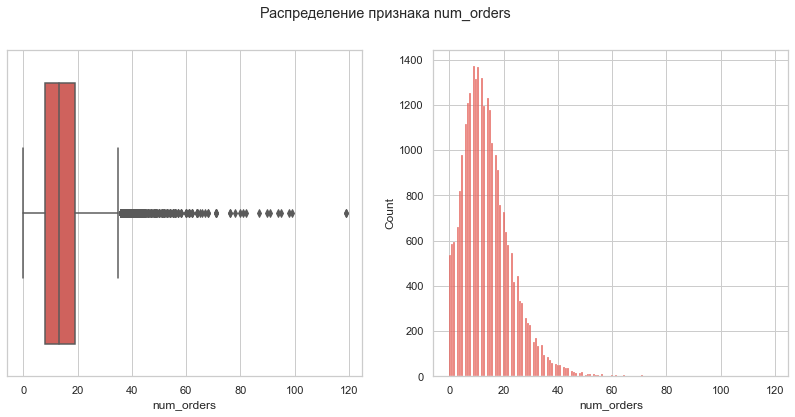

In [16]:
# построим распределение признака
fig, axs = plt.subplots(1, 2, figsize=(14,6));
fig. suptitle('Распределение признака num_orders');
sns.boxplot(data=df, x='num_orders', ax=axs[0]);
sns.histplot(data=df, x='num_orders',ax=axs[1]);

Если количество заказов в районе 40-60 шт в 10 минут выглядят допустимыми, то 100 и более - уже вызывают сомнения. возможно этому есть логичное обоснование и это тренд по увеличению количества заказов у перевозчика.

Проверим эти данные.

In [17]:
# отберем максимальное количество заказов
df.query('num_orders > 80')

,num_orders
datetime,
2018-08-13 02:20:00,119
2018-08-13 02:30:00,99
2018-08-20 02:00:00,87
2018-08-20 02:10:00,90
2018-08-20 02:20:00,94
2018-08-20 02:30:00,82
2018-08-20 04:00:00,91
2018-08-27 02:00:00,98
2018-08-27 02:10:00,119


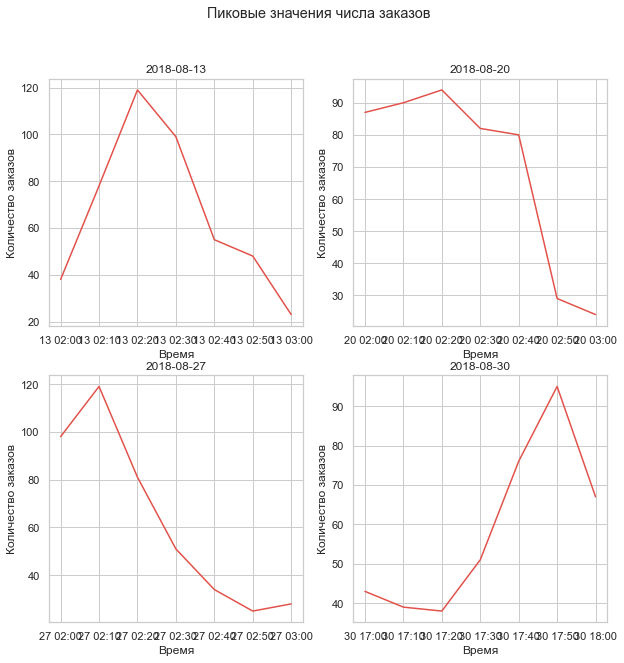

In [18]:
fig, axs = plt.subplots(2,2, figsize=(10, 10));
fig.suptitle('Пиковые значения числа заказов');
# для 2018-08-13
axs[0, 0].set_title('2018-08-13');
axs[0, 0].set_xlabel('Время');
axs[0, 0].set_ylabel('Количество заказов');
axs[0, 0].plot(df['2018-08-13 02:00:00' : '2018-08-13 03:00:00']);

# для 2018-08-20
axs[0, 1].set_title('2018-08-20');
axs[0, 1].set_xlabel('Время');
axs[0, 1].set_ylabel('Количество заказов');
axs[0, 1].plot(df['2018-08-20 02:00:00' : '2018-08-20 03:00:00']);

# для 2018-08-20
axs[1, 0].set_title('2018-08-27');
axs[1, 0].set_xlabel('Время');
axs[1, 0].set_ylabel('Количество заказов');
axs[1 ,0].plot(df['2018-08-27 02:00:00' : '2018-08-27 03:00:00']);


# для 2018-08-30
axs[1, 1].set_title('2018-08-30');
axs[1, 1].set_xlabel('Время');
axs[1, 1].set_ylabel('Количество заказов');
axs[1, 1].plot(df['2018-08-30 17:00:00' : '2018-08-30 18:00:00']);

Судя по графикам и их периодичности, вполне вероятно, что были такие пиковые значения заказов.

* Пики приходятся на 13/20/27 августа на ночное время в районе 2 часов ночи (ночь с воскресенья на понедельник), что легко объяснить возвращением отпускников, скорее всего это пассажиры чартерных рейсы.
* Такое же основание может быть у пика 30/08/2018 в 17:50 - когда оставался 1 день до начала учебного года.

На текущий момент оставим все как есть, проведем ресемплирование данных с временным интервалом 1 час.


In [19]:
# укрупним данные с помощью ресемплирования
df = df.resample('H').sum()
print(f'Количество наблюдение стало :{df.shape}')

Количество наблюдение стало :(4416, 1)


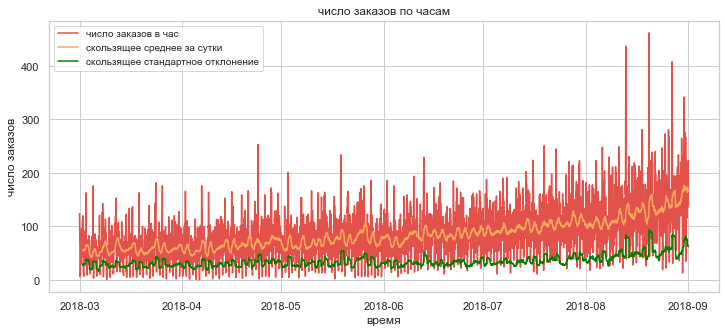

In [20]:
# построим график временного ряда
plt.figure(figsize=(12, 5))
plt.plot(df, label = 'число заказов в час')
plt.plot(df.rolling(24).mean(), label = 'скользящее среднее за сутки')
plt.plot(df.rolling(24).std(), label = 'скользящее стандартное отклонение', color='green')

plt.legend(title='', loc='upper left', fontsize=10)
plt.xlabel('время')
plt.ylabel('число заказов')
plt.title('число заказов по часам')
plt.show;

Точно напоминает кардиограмму, в которой без знаний в предметной области, ничего не понятно.

Видно, что:
* есть пики, которые возникают с периодичностью.
* вроде бы есть восходящий тренд

Посмотрим подробнее с помощью функция `seasonal_decompose()` модуля `tsa.seasonal`.

In [21]:
# декомпозиция на всем временном интервале
decomposed_df = seasonal_decompose(df)

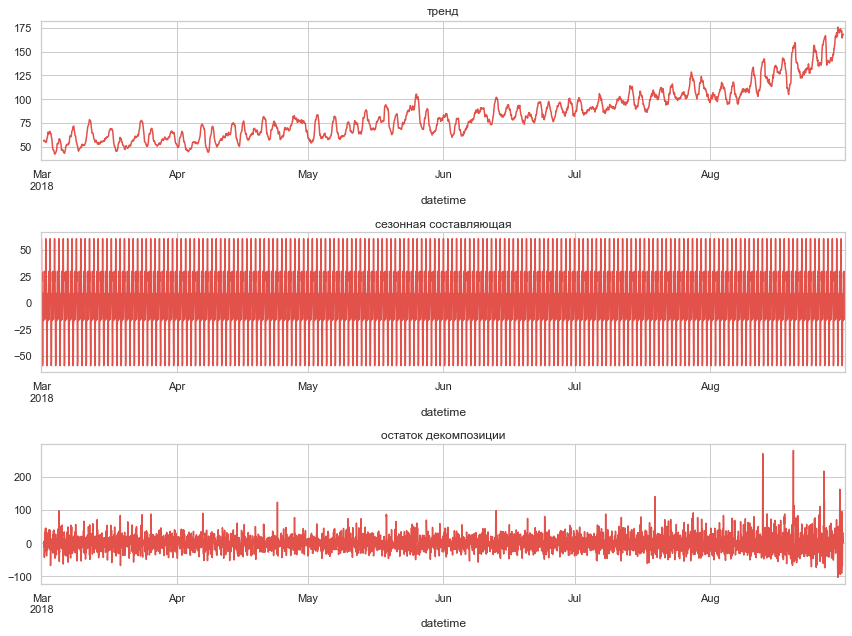

In [22]:
plt.figure(figsize=(12, 9))
plt.subplot(311)

decomposed_df.trend.plot(ax=plt.gca())
plt.title('тренд')
plt.subplot(312)

decomposed_df.seasonal.plot(ax=plt.gca())
plt.title('сезонная составляющая')
plt.subplot(313)

decomposed_df.resid.plot(ax=plt.gca())
plt.title('остаток декомпозиции')
plt.tight_layout()

Посмотрим недельный срез

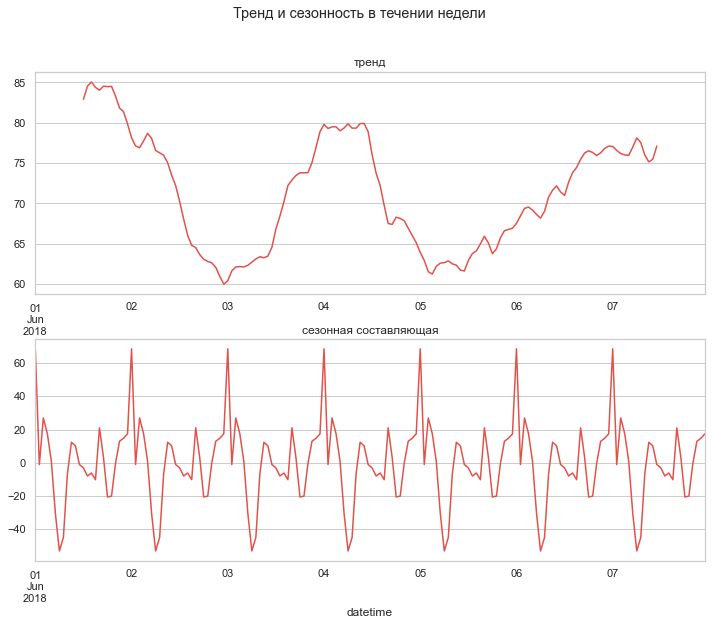

In [23]:
plt.figure(figsize=(12, 9))
plt.suptitle('Тренд и сезонность в течении недели')

plt.subplot(211)
seasonal_decompose(df['2018-06-01' : '2018-06-07']).trend.plot(ax=plt.gca())
plt.title('тренд')

plt.subplot(212)
seasonal_decompose(df['2018-06-01' : '2018-06-07']).seasonal.plot(ax=plt.gca())
plt.title('сезонная составляющая');



Проверим преположение о наличие сезонного фактора и тренда с помощью автокорреляционной функции

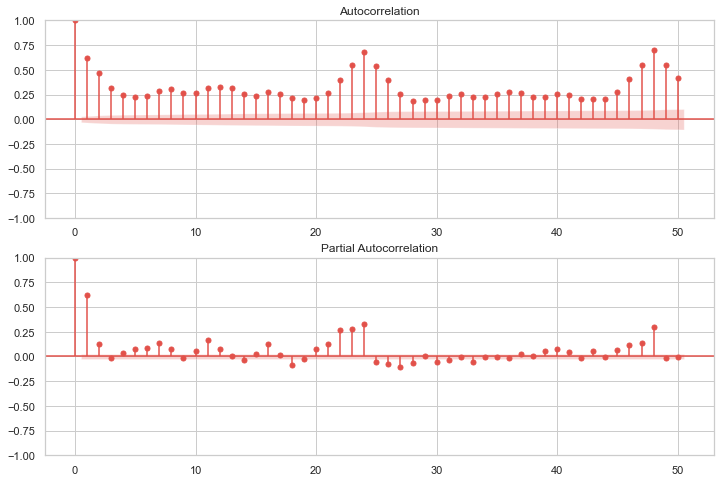

In [24]:
# применим функцию к нашему набору данных
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df.values.squeeze(), lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df, lags=50, ax=ax2, method='yw')

После декомпозиции и постоения автоорреляции явно видно наличие:
 * возрастающего тренда в числе заказов
 * наличии "сезонности"

Также  проверим стационарность процесса еще с помощью статистических тестов из библиотеки statsmodels:
* `adfuller`
* `kpss`

Согласно документации `statsmodels` эти два теста рекомендуется проводить для определения стационарности временного ряда. И уже  зависимости их полученного результата делать выводы о характере процесса.

Нулевая гипотеза $H_0$ состоит в том, что в ряду имеются единичные корни, ряд нестационарен

Альтернативная гипотеза $H_1$ - нет единичных корней и следовательно ряд стационарен

`ADF test`:

* $H_0$ состоит в том, что в ряду имеются единичные корни, ряд нестационарен

* $H_1$ - нет единичных корней и следовательно ряд стационарен

In [25]:
print("Results of Dickey-Fuller Test:")
dftest = adfuller(df['num_orders'], autolag="AIC")
dfoutput = pd.Series(
    dftest[0:4],
    index=[
        "Test Statistic",
        "p-value",
        "#Lags Used",
        "Number of Observations Used",
        ],
    )
for key, value in dftest[4].items():
    dfoutput["Critical Value (%s)" % key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -3.068924
p-value                           0.028940
#Lags Used                       30.000000
Number of Observations Used    4385.000000
Critical Value (1%)              -3.431842
Critical Value (5%)              -2.862199
Critical Value (10%)             -2.567121
dtype: float64


`KPSS test`:
* $H_0$ - процесс стационарен

* $H_1$ - процесс нестационарен

In [26]:
print("Results of KPSS Test:")
kpsstest = kpss(df)
kpss_output = pd.Series(
    kpsstest[0:3], 
    index=[
        "Test Statistic", 
        "p-value", 
        "Lags Used"]
)
for key, value in kpsstest[3].items():
    kpss_output["Critical Value (%s)" % key] = value
print(kpss_output)

Results of KPSS Test:
Test Statistic           10.913353
p-value                   0.010000
Lags Used                32.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


Учитывая результаты тестов и данные документации делаем вывод о том, что
* исходный ряд является нестационарным
* этом разность временного ряда является стационарным.

Это необходимо учитывать при выборе моделей для прогнозирования.

Рассмотрим несколько модификаций исходных данных:
* с дополнительными категориальными признаками 
* с лагами от целевого показателя
* со скользящим средним

Разобем наши данные на обучающую и тестовую выборки

In [27]:
# дополнительные категориальные фичи
df_f = df.copy(deep=True)
df_f, numerical_features_f = make_features(df_f, max_lag=0, rolling_mean_size=0)

In [28]:
(features_train_f, target_train_f, 
 features_test_f, target_test_f) = df_train_test(df_f, 'num_orders')

Проверка хронологии обучающей и тестовой выборки:

Train размер: (3974, 3)

Дата начала наблюдений: 2018-03-01 00:00:00. 
Дата окончания наблюдений:2018-08-13 13:00:00

Временной отрезок: 165 days 13:00:00

Test размер: (442, 3)

Дата начала наблюдений: 2018-08-13 14:00:00. 
Дата окончания наблюдений:2018-08-31 23:00:00

Временной отрезок: 18 days 09:00:00


In [29]:
# добавим лаги
df_lag = df.copy(deep=True)
df_lag, numerical_features_lag = make_features(df_lag,
                                               max_lag=12,
                                               rolling_mean_size=0)

(features_train_lag, target_train_lag, 
features_test_lag, target_test_lag) = df_train_test(df_lag, 'num_orders')

Проверка хронологии обучающей и тестовой выборки:

Train размер: (3963, 15)

Дата начала наблюдений: 2018-03-01 12:00:00. 
Дата окончания наблюдений:2018-08-13 14:00:00

Временной отрезок: 165 days 02:00:00

Test размер: (441, 15)

Дата начала наблюдений: 2018-08-13 15:00:00. 
Дата окончания наблюдений:2018-08-31 23:00:00

Временной отрезок: 18 days 08:00:00


In [30]:
# добавим скользящее среднее
df_ma = df.copy(deep=True)
df_ma, numerical_features_ma = make_features(df_ma, 
                                             max_lag=0,
                                             rolling_mean_size=6)

(features_train_ma, target_train_ma, 
features_test_ma, target_test_ma) = df_train_test(df_ma, 'num_orders')

Проверка хронологии обучающей и тестовой выборки:

Train размер: (3969, 4)

Дата начала наблюдений: 2018-03-01 06:00:00. 
Дата окончания наблюдений:2018-08-13 14:00:00

Временной отрезок: 165 days 08:00:00

Test размер: (441, 4)

Дата начала наблюдений: 2018-08-13 15:00:00. 
Дата окончания наблюдений:2018-08-31 23:00:00

Временной отрезок: 18 days 08:00:00


In [31]:
# соединим все вместе
df_all = df.copy(deep=True)
df_all, numerical_features_all = make_features(df_all, 
                                               max_lag=12, 
                                               rolling_mean_size=6)

(features_train_all, target_train_all, 
 features_test_all, target_test_all) = df_train_test(df_all, 'num_orders')

Проверка хронологии обучающей и тестовой выборки:

Train размер: (3963, 16)

Дата начала наблюдений: 2018-03-01 12:00:00. 
Дата окончания наблюдений:2018-08-13 14:00:00

Временной отрезок: 165 days 02:00:00

Test размер: (441, 16)

Дата начала наблюдений: 2018-08-13 15:00:00. 
Дата окончания наблюдений:2018-08-31 23:00:00

Временной отрезок: 18 days 08:00:00


## Обучение

Начнем подбор моделей с **LinearRegression**:

In [32]:
# определяем признаки
categorical_features = ['dayofweek', 'hour']

In [33]:
# списко для агрегации результатов
list_best_params = []

In [34]:
# подберем для каждой модификации гиперпараметры
# задаем модель
model_lr = LinearRegression()
# гиперпараметры для поиска
params_lr = {}
    
model_diff_features(model_lr, params_lr)  

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [35]:
print_result(list_best_params)

,features_type,model,model_params,RSME,time_search,time_fit,time_predict
0,date_features,LinearRegression(),{},35.060612,0 days 00:00:03.892783,0 days 00:00:00.008007,0 days 00:00:00.003003
1,lag_features,LinearRegression(),{},26.655207,0 days 00:00:00.947863,0 days 00:00:00.015013,0 days 00:00:00.006005
2,rolling_mean,LinearRegression(),{},28.041436,0 days 00:00:00.933851,0 days 00:00:00.010010,0 days 00:00:00.004004
3,all_features,LinearRegression(),{},26.644272,0 days 00:00:00.912832,0 days 00:00:00.013011,0 days 00:00:00.005003


**Ridge**

In [36]:
# подберем для каждой модификации гиперпараметры
# задаем модель
model_r = Ridge(random_state=RS)
# гиперпараметры для поиска
params_r = {'model__alpha': [0.0001, 0.01, 0.1, 1],
            'model__solver': ['svd', 'lsqr', 'sparse_cg', 'sag']}
    
model_diff_features(model_r, params_r)  

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [37]:
# табличка с оптимизированными гиперпараметрами
print_result(list_best_params)

,features_type,model,model_params,RSME,time_search,time_fit,time_predict
0,date_features,LinearRegression(),{},35.060612,0 days 00:00:03.892783,0 days 00:00:00.008007,0 days 00:00:00.003003
1,lag_features,LinearRegression(),{},26.655207,0 days 00:00:00.947863,0 days 00:00:00.015013,0 days 00:00:00.006005
2,rolling_mean,LinearRegression(),{},28.041436,0 days 00:00:00.933851,0 days 00:00:00.010010,0 days 00:00:00.004004
3,all_features,LinearRegression(),{},26.644272,0 days 00:00:00.912832,0 days 00:00:00.013011,0 days 00:00:00.005003
4,date_features,"Ridge(alpha=0.0001, random_state=2023, solver='sag')","{'model__alpha': 0.0001, 'model__solver': 'sag'}",35.056847,0 days 00:00:01.024046,0 days 00:00:00.016901,0 days 00:00:00.003003
5,lag_features,"Ridge(alpha=0.0001, random_state=2023, solver='sag')","{'model__alpha': 0.0001, 'model__solver': 'sag'}",26.649666,0 days 00:00:00.279255,0 days 00:00:00.038034,0 days 00:00:00.005005
6,rolling_mean,"Ridge(alpha=0.0001, random_state=2023, solver='sag')","{'model__alpha': 0.0001, 'model__solver': 'sag'}",28.041429,0 days 00:00:00.181164,0 days 00:00:00.015015,0 days 00:00:00.005004
7,all_features,"Ridge(alpha=0.0001, random_state=2023, solver='lsqr')","{'model__alpha': 0.0001, 'model__solver': 'lsqr'}",26.633107,0 days 00:00:00.250228,0 days 00:00:00.011010,0 days 00:00:00.005004


**DecisionTreeRegressor**

Проверим как себя поведет базовая "деревянная" модель

In [38]:
# подберем для каждой модификации гиперпараметры
# задаем модель
model_dt = DecisionTreeRegressor(random_state=RS)
# гиперпараметры для поиска
params_dt = {'model__max_depth': [None] + [i for i in range(6, 10)]}
    
model_diff_features(model_dt, params_dt)  

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [39]:
# табличка с оптимизированными гиперпараметрами
print_result(list_best_params)

,features_type,model,model_params,RSME,time_search,time_fit,time_predict
0,date_features,LinearRegression(),{},35.060612,0 days 00:00:03.892783,0 days 00:00:00.008007,0 days 00:00:00.003003
1,lag_features,LinearRegression(),{},26.655207,0 days 00:00:00.947863,0 days 00:00:00.015013,0 days 00:00:00.006005
2,rolling_mean,LinearRegression(),{},28.041436,0 days 00:00:00.933851,0 days 00:00:00.010010,0 days 00:00:00.004004
3,all_features,LinearRegression(),{},26.644272,0 days 00:00:00.912832,0 days 00:00:00.013011,0 days 00:00:00.005003
4,date_features,"Ridge(alpha=0.0001, random_state=2023, solver='sag')","{'model__alpha': 0.0001, 'model__solver': 'sag'}",35.056847,0 days 00:00:01.024046,0 days 00:00:00.016901,0 days 00:00:00.003003
5,lag_features,"Ridge(alpha=0.0001, random_state=2023, solver='sag')","{'model__alpha': 0.0001, 'model__solver': 'sag'}",26.649666,0 days 00:00:00.279255,0 days 00:00:00.038034,0 days 00:00:00.005005
6,rolling_mean,"Ridge(alpha=0.0001, random_state=2023, solver='sag')","{'model__alpha': 0.0001, 'model__solver': 'sag'}",28.041429,0 days 00:00:00.181164,0 days 00:00:00.015015,0 days 00:00:00.005004
7,all_features,"Ridge(alpha=0.0001, random_state=2023, solver='lsqr')","{'model__alpha': 0.0001, 'model__solver': 'lsqr'}",26.633107,0 days 00:00:00.250228,0 days 00:00:00.011010,0 days 00:00:00.005004
8,date_features,DecisionTreeRegressor(random_state=2023),{'model__max_depth': None},34.378876,0 days 00:00:00.125114,0 days 00:00:00.010009,0 days 00:00:00.003003
9,lag_features,"DecisionTreeRegressor(max_depth=7, random_state=2023)",{'model__max_depth': 7},31.696340,0 days 00:00:00.125114,0 days 00:00:00.028025,0 days 00:00:00.005005


**LGBMRegressor**

In [40]:
# подберем для каждой модификации гиперпараметры
# задаем модель
model_lgbm = LGBMRegressor(random_state=RS)

# гиперпараметры для поиска
params_lgbm = {
    'model__n_estimators': [1000, 2000, 2500],
    'model__learning_rate': [0.1, 0.2]
}

In [41]:
model_diff_features(model_lgbm, params_lgbm)  

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [42]:
# табличка с оптимизированными гиперпараметрами
print_result(list_best_params)

,features_type,model,model_params,RSME,time_search,time_fit,time_predict
0,date_features,LinearRegression(),{},35.060612,0 days 00:00:03.892783,0 days 00:00:00.008007,0 days 00:00:00.003003
1,lag_features,LinearRegression(),{},26.655207,0 days 00:00:00.947863,0 days 00:00:00.015013,0 days 00:00:00.006005
2,rolling_mean,LinearRegression(),{},28.041436,0 days 00:00:00.933851,0 days 00:00:00.010010,0 days 00:00:00.004004
3,all_features,LinearRegression(),{},26.644272,0 days 00:00:00.912832,0 days 00:00:00.013011,0 days 00:00:00.005003
4,date_features,"Ridge(alpha=0.0001, random_state=2023, solver='sag')","{'model__alpha': 0.0001, 'model__solver': 'sag'}",35.056847,0 days 00:00:01.024046,0 days 00:00:00.016901,0 days 00:00:00.003003
5,lag_features,"Ridge(alpha=0.0001, random_state=2023, solver='sag')","{'model__alpha': 0.0001, 'model__solver': 'sag'}",26.649666,0 days 00:00:00.279255,0 days 00:00:00.038034,0 days 00:00:00.005005
6,rolling_mean,"Ridge(alpha=0.0001, random_state=2023, solver='sag')","{'model__alpha': 0.0001, 'model__solver': 'sag'}",28.041429,0 days 00:00:00.181164,0 days 00:00:00.015015,0 days 00:00:00.005004
7,all_features,"Ridge(alpha=0.0001, random_state=2023, solver='lsqr')","{'model__alpha': 0.0001, 'model__solver': 'lsqr'}",26.633107,0 days 00:00:00.250228,0 days 00:00:00.011010,0 days 00:00:00.005004
8,date_features,DecisionTreeRegressor(random_state=2023),{'model__max_depth': None},34.378876,0 days 00:00:00.125114,0 days 00:00:00.010009,0 days 00:00:00.003003
9,lag_features,"DecisionTreeRegressor(max_depth=7, random_state=2023)",{'model__max_depth': 7},31.696340,0 days 00:00:00.125114,0 days 00:00:00.028025,0 days 00:00:00.005005


**CatBoostRegressor**

In [43]:
# создадим модель
model_cb = CatBoostRegressor(random_state=RS, 
                             loss_function='RMSE',
                             verbose=False,
                             thread_count=-1)

In [44]:
# # # гиперпараметры для поиска
params_cb = {'iterations':[100, 200],
             'learning_rate': [0.1, 0.3],
             'depth': [6, 9],
             'l2_leaf_reg': [6, 9]
            }

In [45]:
model_diff_features_cat(model_cb, params_cb)  

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [46]:
# табличка с оптимизированными гиперпараметрами
print_result(list_best_params)

,features_type,model,model_params,RSME,time_search,time_fit,time_predict
0,date_features,LinearRegression(),{},35.060612,0 days 00:00:03.892783,0 days 00:00:00.008007,0 days 00:00:00.003003
1,lag_features,LinearRegression(),{},26.655207,0 days 00:00:00.947863,0 days 00:00:00.015013,0 days 00:00:00.006005
2,rolling_mean,LinearRegression(),{},28.041436,0 days 00:00:00.933851,0 days 00:00:00.010010,0 days 00:00:00.004004
3,all_features,LinearRegression(),{},26.644272,0 days 00:00:00.912832,0 days 00:00:00.013011,0 days 00:00:00.005003
4,date_features,"Ridge(alpha=0.0001, random_state=2023, solver='sag')","{'model__alpha': 0.0001, 'model__solver': 'sag'}",35.056847,0 days 00:00:01.024046,0 days 00:00:00.016901,0 days 00:00:00.003003
5,lag_features,"Ridge(alpha=0.0001, random_state=2023, solver='sag')","{'model__alpha': 0.0001, 'model__solver': 'sag'}",26.649666,0 days 00:00:00.279255,0 days 00:00:00.038034,0 days 00:00:00.005005
6,rolling_mean,"Ridge(alpha=0.0001, random_state=2023, solver='sag')","{'model__alpha': 0.0001, 'model__solver': 'sag'}",28.041429,0 days 00:00:00.181164,0 days 00:00:00.015015,0 days 00:00:00.005004
7,all_features,"Ridge(alpha=0.0001, random_state=2023, solver='lsqr')","{'model__alpha': 0.0001, 'model__solver': 'lsqr'}",26.633107,0 days 00:00:00.250228,0 days 00:00:00.011010,0 days 00:00:00.005004
8,date_features,DecisionTreeRegressor(random_state=2023),{'model__max_depth': None},34.378876,0 days 00:00:00.125114,0 days 00:00:00.010009,0 days 00:00:00.003003
9,lag_features,"DecisionTreeRegressor(max_depth=7, random_state=2023)",{'model__max_depth': 7},31.696340,0 days 00:00:00.125114,0 days 00:00:00.028025,0 days 00:00:00.005005


In [47]:
results = pd.DataFrame(list_best_params)

Отберем максимально точные модели

In [48]:
results.query('RSME <27')

,features_type,model,model_params,RSME,time_search,time_fit,time_predict
1,lag_features,LinearRegression(),{},26.655207,0 days 00:00:00.947863,0 days 00:00:00.015013,0 days 00:00:00.006005
3,all_features,LinearRegression(),{},26.644272,0 days 00:00:00.912832,0 days 00:00:00.013011,0 days 00:00:00.005003
5,lag_features,"Ridge(alpha=0.0001, random_state=2023, solver='sag')","{'model__alpha': 0.0001, 'model__solver': 'sag'}",26.649666,0 days 00:00:00.279255,0 days 00:00:00.038034,0 days 00:00:00.005005
7,all_features,"Ridge(alpha=0.0001, random_state=2023, solver='lsqr')","{'model__alpha': 0.0001, 'model__solver': 'lsqr'}",26.633107,0 days 00:00:00.250228,0 days 00:00:00.011010,0 days 00:00:00.005004
17,lag_features,<catboost.core.CatBoostRegressor object at 0x00000273CAE9BF70>,"{'depth': 6, 'iterations': 200, 'l2_leaf_reg': 9, 'learning_rate': 0.1}",26.488445,0 days 00:00:16.585634,0 days 00:00:40.634222,0 days 00:00:00.006005
19,all_features,<catboost.core.CatBoostRegressor object at 0x00000273CAEB8460>,"{'depth': 6, 'iterations': 200, 'l2_leaf_reg': 6, 'learning_rate': 0.1}",26.634981,0 days 00:00:18.250623,0 days 00:00:45.190162,0 days 00:00:00.009008


Таким образом, 
* `CatbBoost` выдал наилучший результат для всех типов дополнительных фичей.
* совсем немного уступают линейные модели, но есть подозрение о наличии переобучения
* при этом время обучения даже такой незначительной модели на `CatBooost` составляет более 40 секунд. 

На финальное тестирование возьмем:
* `CatBoost` с лагами

## Тестирование

`CatBoostRegressor` с лагами от целевого показателя


In [49]:
best_model_cat = results['model'][17]
best_model_cat.fit(features_train_lag, target_train_lag)

In [50]:
time_start = dt.now()
predictions = best_model_cat.predict(features_test_lag, thread_count=-1)
time_predict = dt.now() - time_start

rsme_cb = mean_squared_error(target_test_lag, predictions, squared=False)

print('CatboostRegressor с "отстающими признаками": ')
print(f'RSME на тестовой выборке: {rsme_cb:.2f}')
print(f'Время предсказания на тестовой выборке модели CatboostRegressor: {time_predict}')

CatboostRegressor с "отстающими признаками": 
RSME на тестовой выборке: 46.37
Время предсказания на тестовой выборке модели CatboostRegressor: 0:00:00.002002


Проверим модель на адекватность с помощью `DummyRegressor`. 
Предскажем все средним значением.

In [51]:
model_dm = DummyRegressor(strategy='mean')
model_dm.fit(features_train_f, target_train_f)

RSME_dm = mean_squared_error(target_test_f, model_dm.predict(features_test_f), squared=False) 
print(f'RSME Dummy-модели составляет {RSME_dm:.4f}')


RSME Dummy-модели составляет 84.7441



Модель `Dummy` показала наихудшие результаты предсказания. Следовательно, наша модель имеет полное право на существование.


### Выводы

В ходе реализации проекта были выполнены следующие этапы:

1. загружены и изучены данные
2. проведена преобработка данных
    * проведено исследование на стационарнось данных
    * сгенерированы дополнительные признаки

3. Проведено построение ML и подбор гиперпараметров
 * данные разбиты на обучающую и тестовую выборки
 * построены модели, проведена оценка метрики методом кросс-валидации
    * `LinearRegression`
    * `Ridge`
    * `DecisionTree`
    * `LightGBM`
    * `CatBoosting`
 * проведена оценка времени обучения, времени предсказания
 * подобраны лучшие гиперпараметры
 * выбраны лучшие модели для тестирования

4. Проверено качество лучшие модели на тестовой выборке.
 * подтвердилось предположение, что пригенерации дополнительных признаков на основании целевого модели склонны к переобучению.   

В `CatboostRegressor` при тестировании прошел установленный порог `RSME`.
* Итоговый показатель RSME составил - 46.37

Дополнительно модель проверена на адекватность c помощью `DummyRegressor`.